In [1]:
import pandas as pd
import numpy as np

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import collections
import itertools
from nltk import bigrams
import networkx as nx
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving 2020.csv to 2020.csv
Saving 2021.csv to 2021.csv
Saving 2022.csv to 2022.csv


In [3]:
df_2017=pd.read_csv('2017.csv') #read data into a dataframe
df_2018=pd.read_csv('2018.csv')
df_2019=pd.read_csv('2019.csv')
df_2020=pd.read_csv('2020.csv')
df_2021=pd.read_csv('2021.csv')
df_2022=pd.read_csv('2022.csv')

In [ ]:
df_2017['tweet'] = df_2017['tweet'].str.replace('[^\w\s]','')
df_2018['tweet'] = df_2018['tweet'].str.replace('[^\w\s]','')
df_2019['tweet'] = df_2019['tweet'].str.replace('[^\w\s]','')
df_2020['tweet'] = df_2020['tweet'].str.replace('[^\w\s]','')
df_2021['tweet'] = df_2021['tweet'].str.replace('[^\w\s]','')
df_2022['tweet'] = df_2022['tweet'].str.replace('[^\w\s]','')

In [ ]:
df_2017['tweet'] = df_2017['tweet'].str.replace('\d+', '')
df_2018['tweet'] = df_2018['tweet'].str.replace('\d+', '')
df_2019['tweet'] = df_2019['tweet'].str.replace('\d+', '')
df_2020['tweet'] = df_2020['tweet'].str.replace('\d+', '')
df_2021['tweet'] = df_2021['tweet'].str.replace('\d+', '')
df_2022['tweet'] = df_2022['tweet'].str.replace('\d+', '')

In [6]:
df_2017['tweet'] = df_2017['tweet'].apply(lambda a: re.sub(r'http\S+', '', a)) 
df_2017['tweet'] = df_2017['tweet'].apply(lambda b: re.sub(r'www?\S+', '', b))
df_2018['tweet'] = df_2018['tweet'].apply(lambda a: re.sub(r'http\S+', '', a)) 
df_2018['tweet'] = df_2018['tweet'].apply(lambda b: re.sub(r'www?\S+', '', b))
df_2019['tweet'] = df_2019['tweet'].apply(lambda a: re.sub(r'http\S+', '', a)) 
df_2019['tweet'] = df_2019['tweet'].apply(lambda b: re.sub(r'www?\S+', '', b))
df_2020['tweet'] = df_2020['tweet'].apply(lambda a: re.sub(r'http\S+', '', a)) 
df_2020['tweet'] = df_2020['tweet'].apply(lambda b: re.sub(r'www?\S+', '', b))
df_2021['tweet'] = df_2021['tweet'].apply(lambda a: re.sub(r'http\S+', '', a)) 
df_2021['tweet'] = df_2021['tweet'].apply(lambda b: re.sub(r'www?\S+', '', b))
df_2022['tweet'] = df_2022['tweet'].apply(lambda a: re.sub(r'http\S+', '', a)) 
df_2022['tweet'] = df_2022['tweet'].apply(lambda b: re.sub(r'www?\S+', '', b))

In [6]:
df = pd.concat([df_2017,df_2018,df_2019,df_2020,df_2021,df_2022], ignore_index=True)

In [7]:
df

Unnamed: 0                   id      conversation_id  \
0             0.0   945814723521417217   945712432416137217   
1             1.0   945749747129659392   945712432416137217   
2             2.0   945748731197980672   945712432416137217   
3             3.0   945730195113365504   945727773493968896   
4             4.0   945729852874694656   945712432416137217   
...           ...                  ...                  ...   
29619         NaN  1477775713172402176  1477775713172402176   
29620         NaN  1477706142461706248  1477706142461706248   
29621         NaN  1477700424933253123  1477700424933253123   
29622         NaN  1477096955658579974  1476958174439567360   
29623         NaN  1477080438049058818  1476768985509212162   

                                      created_at                 date  \
0                                1514334777000.0  2017-12-27 00:32:57   
1                                1514319285000.0  2017-12-26 20:14:45   
2                                1514319043000.0  2017-12-26 20:10:43   
3                                1514314623000.0  2017-12-26 18:57:03   
4                                1514314542000.0  2017-12-26 18:55:42   
...                                          ...                  ...   
29619  2022-01-03 02:56:00 Arabian Standard Time           2022-01-03   
29620  2022-01-02 22:19:33 Arabian Standard Time           2022-01-02   
29621  2022-01-02 21:56:50 Arabian Standard Time           2022-01-02   
29622  2022-01-01 05:58:52 Arabian Standard Time           2022-01-01   
29623  2022-01-01 04:53:13 Arabian Standard Time           2022-01-01   

       timezone  place                                              tweet  \
0             0    NaN                  neilsiegel Tesla Coming very soon   
1             0    NaN         Kreative Vastly better mapsnav coming soon   
2             0    NaN                                        dd_hogan Ok   
3             0    NaN                                   Jason Tesla Sure   
4             0    NaN  kabirakhtar Yeah its terrible Had to upgrade o...   
...         ...    ...                                                ...   
29619       400    NaN                                  httpstcoLAhPzVlGx   
29620       400    NaN                     Lets make the roaring s happen   
29621       400    NaN                 Great work by Tesla team worldwide   
29622       400    NaN                                      BLKMDL Tesla    
29623       400    NaN                     MiFSDBetaTester WholeMarsBlog    

      language hashtags  ...  \
0           en       []  ...   
1           en       []  ...   
2          und       []  ...   
3           en       []  ...   
4           en       []  ...   
...        ...      ...  ...   
29619      und       []  ...   
29620       en       []  ...   
29621       en       []  ...   
29622      und       []  ...   
29623      und       []  ...   

                                                reply_to  retweet_date  \
0      [{'screen_name': 'neilsiegel', 'name': 'Neil S...           NaN   
1      [{'screen_name': 'Kreative', 'name': 'Leslie',...           NaN   
2      [{'screen_name': 'dd_hogan', 'name': 'Live4EVD...           NaN   
3      [{'screen_name': 'Jason', 'name': 'jason@calac...           NaN   
4      [{'screen_name': 'kabirakhtar', 'name': 'kabir...           NaN   
...                                                  ...           ...   
29619                                                 []           NaN   
29620                                                 []           NaN   
29621                                                 []           NaN   
29622  [{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...           NaN   
29623  [{'screen_name': 'MiFSDBetaTester', 'name': 'R...           NaN   

       translate trans_src trans_dest      time  mentions replies_count  \
0            NaN       NaN        NaN       NaN       NaN           NaN   
1            NaN       N

In [8]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [9]:
df

Unnamed: 0                   id      conversation_id  \
0             0.0   945814723521417217   945712432416137217   
1             1.0   945749747129659392   945712432416137217   
2             2.0   945748731197980672   945712432416137217   
3             3.0   945730195113365504   945727773493968896   
4             4.0   945729852874694656   945712432416137217   
...           ...                  ...                  ...   
29619         NaN  1477775713172402176  1477775713172402176   
29620         NaN  1477706142461706248  1477706142461706248   
29621         NaN  1477700424933253123  1477700424933253123   
29622         NaN  1477096955658579974  1476958174439567360   
29623         NaN  1477080438049058818  1476768985509212162   

                                      created_at                 date  \
0                                1514334777000.0  2017-12-27 00:32:57   
1                                1514319285000.0  2017-12-26 20:14:45   
2                                1514319043000.0  2017-12-26 20:10:43   
3                                1514314623000.0  2017-12-26 18:57:03   
4                                1514314542000.0  2017-12-26 18:55:42   
...                                          ...                  ...   
29619  2022-01-03 02:56:00 Arabian Standard Time           2022-01-03   
29620  2022-01-02 22:19:33 Arabian Standard Time           2022-01-02   
29621  2022-01-02 21:56:50 Arabian Standard Time           2022-01-02   
29622  2022-01-01 05:58:52 Arabian Standard Time           2022-01-01   
29623  2022-01-01 04:53:13 Arabian Standard Time           2022-01-01   

       timezone  place                                              tweet  \
0             0    NaN                  neilsiegel Tesla Coming very soon   
1             0    NaN         Kreative Vastly better mapsnav coming soon   
2             0    NaN                                        dd_hogan Ok   
3             0    NaN                                   Jason Tesla Sure   
4             0    NaN  kabirakhtar Yeah its terrible Had to upgrade o...   
...         ...    ...                                                ...   
29619       400    NaN                                  httpstcoLAhPzVlGx   
29620       400    NaN                     Lets make the roaring s happen   
29621       400    NaN                 Great work by Tesla team worldwide   
29622       400    NaN                                      BLKMDL Tesla    
29623       400    NaN                     MiFSDBetaTester WholeMarsBlog    

      language hashtags  ... retweet_date  translate  trans_src trans_dest  \
0           en       []  ...          NaN        NaN        NaN        NaN   
1           en       []  ...          NaN        NaN        NaN        NaN   
2          und       []  ...          NaN        NaN        NaN        NaN   
3           en       []  ...          NaN        NaN        NaN        NaN   
4           en       []  ...          NaN        NaN        NaN        NaN   
...        ...      ...  ...          ...        ...        ...        ...   
29619      und       []  ...          NaN        NaN        NaN        NaN   
29620       en       []  ...          NaN        NaN        NaN        NaN   
29621       en       []  ...          NaN        NaN        NaN        NaN   
29622      und       []  ...          NaN        NaN        NaN        NaN   
29623      und       []  ...          NaN        NaN        NaN        NaN   

           time  mentions  replies_count retweets_count likes_count  year  
0           NaN       NaN            NaN            NaN         NaN  2017  
1           NaN       NaN            NaN            NaN         NaN  2017  
2           NaN       NaN            NaN            NaN         NaN  2017  
3           NaN       NaN            NaN            NaN         NaN  2017  
4           NaN       NaN            NaN            NaN         NaN  2017  
...         ...       ...            ...            ...

In [12]:
#creating a list of stopwords
stop_words = stopwords.words('english')

In [10]:
df = df[['year','tweet']]

In [11]:
df = df[(df['year']>=2017) & (df['year']<=2022)]

In [12]:
df

year                                              tweet
0      2017                  neilsiegel Tesla Coming very soon
1      2017         Kreative Vastly better mapsnav coming soon
2      2017                                        dd_hogan Ok
3      2017                                   Jason Tesla Sure
4      2017  kabirakhtar Yeah its terrible Had to upgrade o...
...     ...                                                ...
29619  2022                                  httpstcoLAhPzVlGx
29620  2022                     Lets make the roaring s happen
29621  2022                 Great work by Tesla team worldwide
29622  2022                                      BLKMDL Tesla 
29623  2022                     MiFSDBetaTester WholeMarsBlog 

[23606 rows x 2 columns]

In [16]:
#removing stop words
df['tweet'] = df['tweet'].apply(lambda m: [i for i in m if i not in stop_words])

In [13]:
wordfrequency_df = pd.DataFrame()

In [14]:
for year in df['year'].unique():
    a = Counter(df[df['year'] == year].iloc[0,1])
    data = pd.DataFrame(a.items(), columns = ['word','Frequency'])
    data['year'] = year
    wordfrequency_df = wordfrequency_df.append(data, ignore_index = True)

In [26]:
#Printing the top ten frquently repeated words
for k in wordfrequency_df['year'].unique():
  print("\n")
  print(wordfrequency_df[wordfrequency_df['year'] == k].sort_values(by = 'Frequency', ascending = False).head(10).reset_index().drop('index', axis = 1))



     word  Frequency  year
0       I        414  2017
1     amp        258  2017
2   Tesla        234  2017
3   Model        174  2017
4     The        168  2017
5  SpaceX        153  2017
6    like        144  2017
7     Yes        135  2017
8    next        123  2017
9       3        120  2017


     word  Frequency  year
0     amp       1572  2018
1   Tesla       1345  2018
2       I        810  2018
3     car        336  2018
4       3        306  2018
5     Yes        303  2018
6   Model        288  2018
7    like        270  2018
8     The        270  2018
9  SpaceX        264  2018


             word  Frequency  year
0           Tesla       1130  2019
1             amp        961  2019
2  Erdayastronaut        520  2019
3          SpaceX        427  2019
4         flcnhvy        364  2019
5             Yes        285  2019
6               I        272  2019
7   teslaownersSV        182  2019
8        Starship        177  2019
9       Teslarati        175  2019


             

[Text(0.5, 1.0, 'Year 2017')]

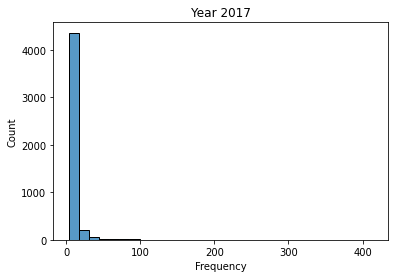

In [27]:
import seaborn as sns
sns.histplot(data=wordfrequency_df[wordfrequency_df['year'] == 2017], x="Frequency", bins=10).set(title='Year 2017')

[Text(0.5, 1.0, 'Year 2018')]

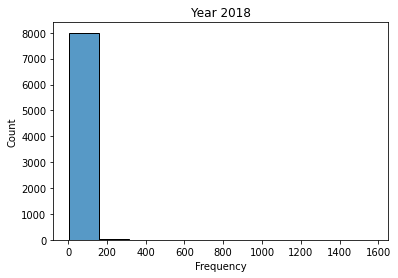

In [30]:
sns.histplot(data=wordfrequency_df[wordfrequency_df['year'] == 2018], x="Frequency", bins=10).set(title='Year 2018')

[Text(0.5, 1.0, 'Year 2019')]

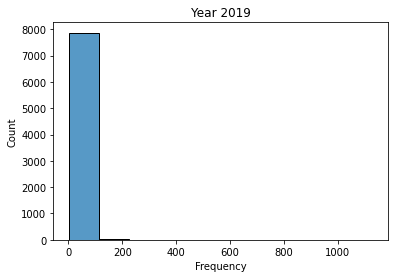

In [31]:
sns.histplot(data=wordfrequency_df[wordfrequency_df['year'] == 2019], x="Frequency", bins=10).set(title='Year 2019')

[Text(0.5, 1.0, 'Year 2020')]

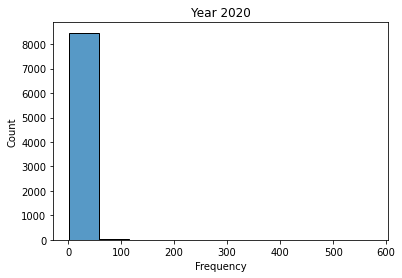

In [32]:
sns.histplot(data=wordfrequency_df[wordfrequency_df['year'] == 2020], x="Frequency", bins=10).set(title='Year 2020')

[Text(0.5, 1.0, 'Year 2021')]

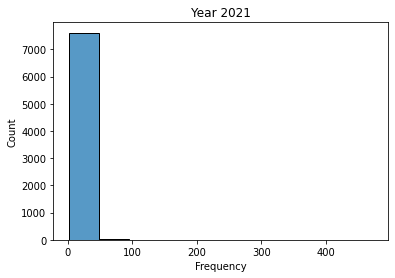

In [33]:
sns.histplot(data=wordfrequency_df[wordfrequency_df['year'] == 2021], x="Frequency", bins=10).set(title='Year 2021')

[Text(0.5, 1.0, 'Year 2022')]

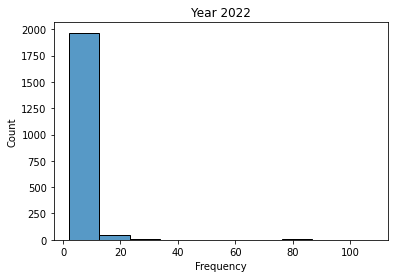

In [34]:
sns.histplot(data=wordfrequency_df[wordfrequency_df['year'] == 2022], x="Frequency", bins=10).set(title='Year 2022')

 Use Zipf’s law and plot log-log plots of word frequencies and rank for each year

Text(0.5, 1.0, 'Year 2017')

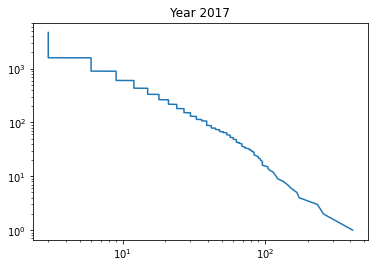

In [35]:
df_2017 = wordfrequency_df[wordfrequency_df['year'] == 2017].sort_values(by = 'Frequency', ascending = False)
df_2017['rank'] = range(1,len(df_2017)+1)
plt.loglog(df_2017['Frequency'], df_2017['rank'])
plt.title('Year 2017')

In [36]:
df_2017

word  Frequency  year  rank
44            I        414  2017     1
145         amp        258  2017     2
1         Tesla        234  2017     3
69        Model        174  2017     4
120         The        168  2017     5
...         ...        ...   ...   ...
2204      Dunno          3  2017  4684
2205        Bad          3  2017  4685
2206   feelings          3  2017  4686
2207  correlate          3  2017  4687
4687      Force          3  2017  4688

[4688 rows x 4 columns]

In [ ]:
df_freq_2017=df_2017.iloc[:,0:2]
df_freq_2017

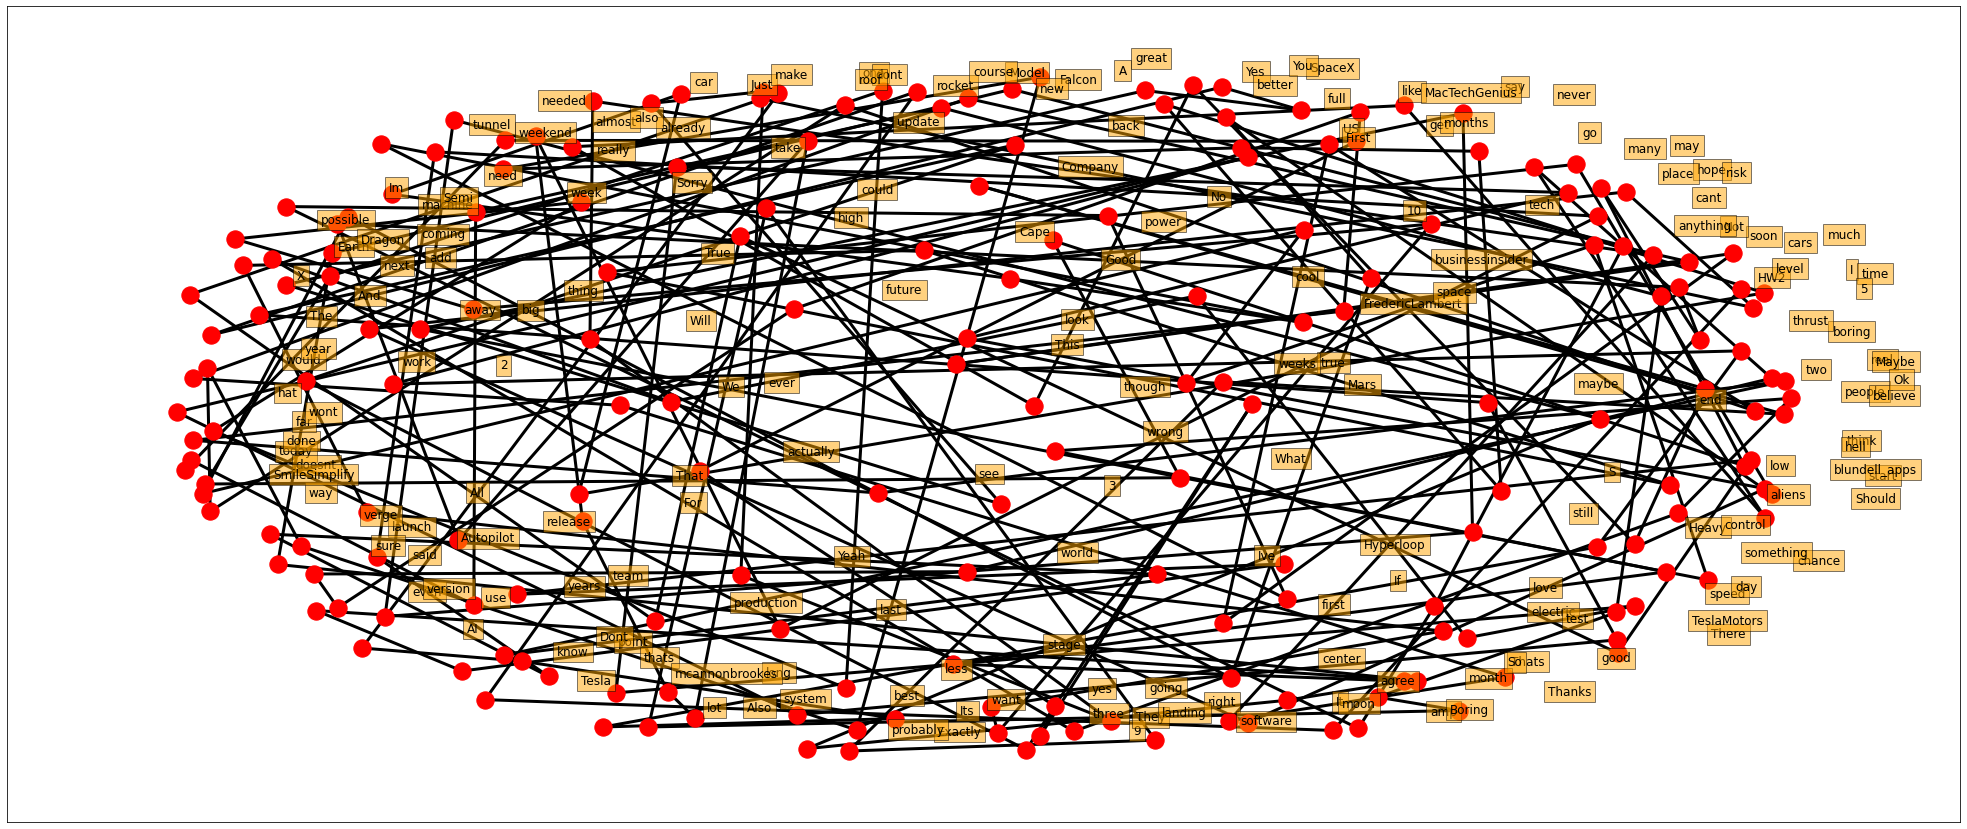

In [49]:
#create bigrams for year 2017

df_freq_2017=df_2017.iloc[:,0:2]
freq_list_2017=df_freq_2017["word"].tolist()

from nltk.util import bigrams
#x=list(bigrams(freq_list))
bigrams =list(nltk.bigrams(freq_list_2017))

bigra_dist =nltk.FreqDist(bigrams)
df_bigrams=pd.DataFrame(bigra_dist.most_common(200),columns=['Bigrams','Frequency'])


# Creating  dictionary of bigrams
dic = df_bigrams.set_index('Bigrams').T.to_dict('records')

# Create network plot 
N = nx.Graph()

# Create connections between nodes
for a, b in dic[0].items():
    N.add_edge(a[0], a[1], weight=(b * 10))

fig, ax = plt.subplots(figsize=(35, 15))

pos = nx.spring_layout(N, k=2)

# Plot networks
nx.draw_networkx(N, pos,
                 font_size=16,
                 width=3,
                 edge_color='black',
                 node_color='red',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='orange', alpha=0.5),
            horizontalalignment='center', fontsize=12)
    
plt.show()

Text(0.5, 1.0, 'Year 2018')

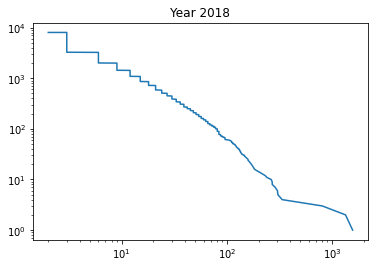

In [40]:
df_2018 = wordfrequency_df[wordfrequency_df['year'] == 2018].sort_values(by = 'Frequency', ascending = False)
df_2018['rank'] = range(1,len(df_2018)+1)
plt.loglog(df_2018['Frequency'], df_2018['rank'])
plt.title('Year 2018')

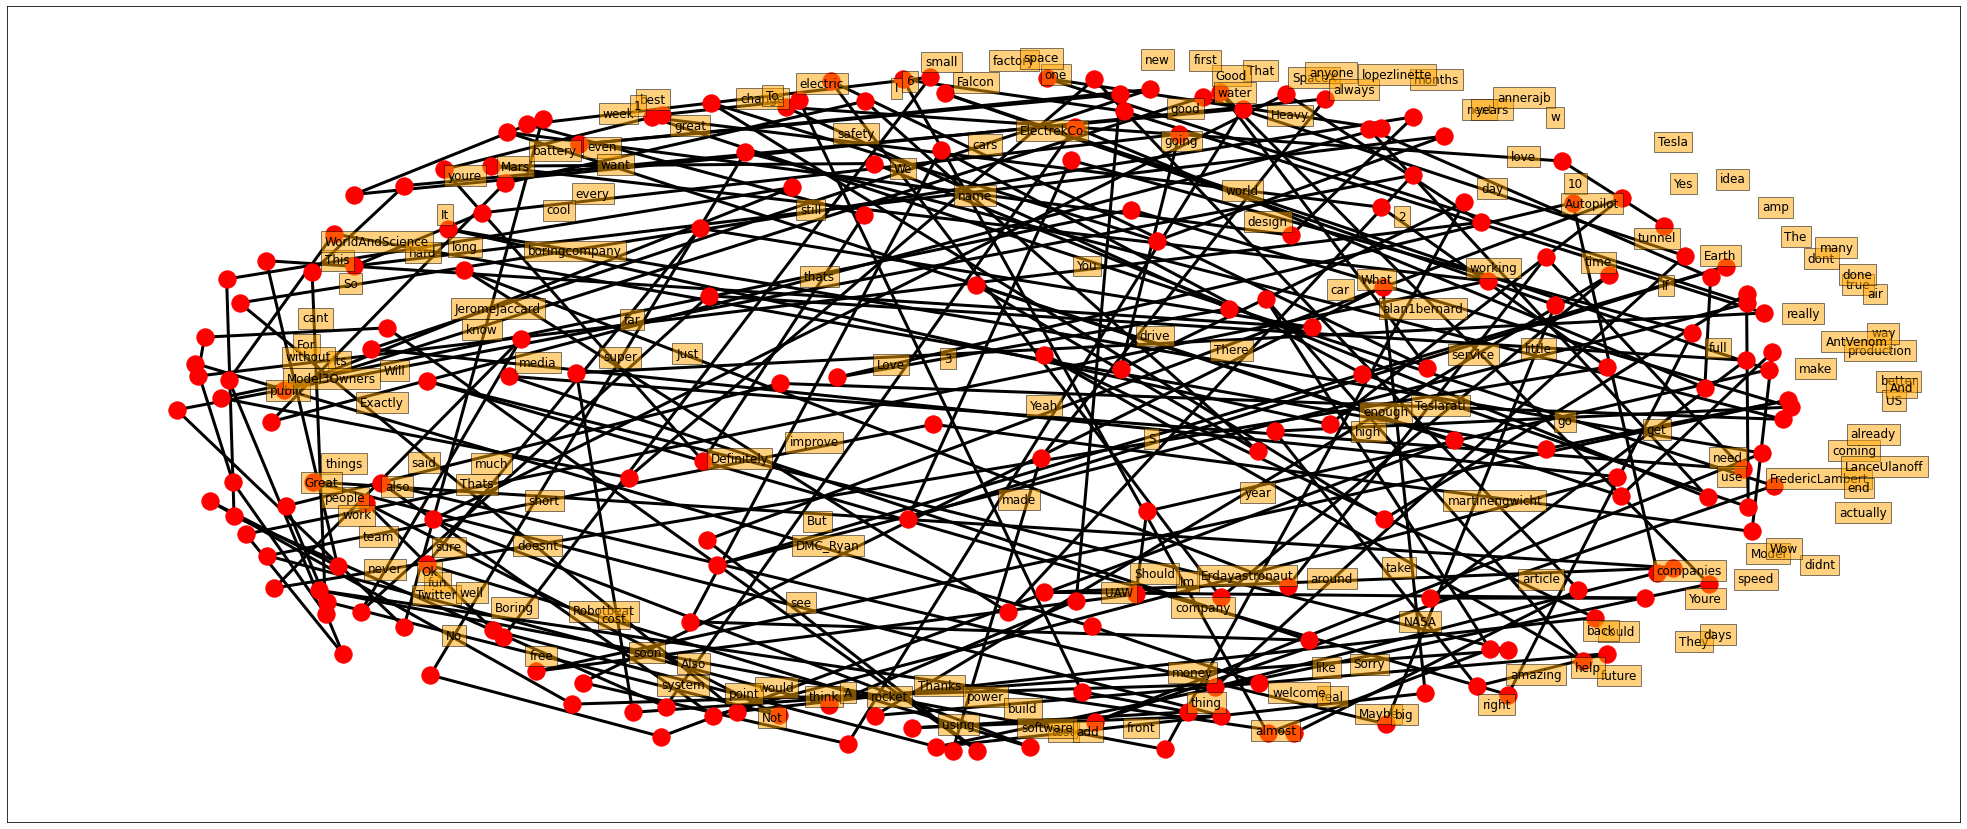

In [48]:
#create bigrams for year 2018

df_freq_2018=df_2018.iloc[:,0:2]
freq_list_2018=df_freq_2018["word"].tolist()

from nltk.util import bigrams
#x=list(bigrams(freq_list))
bigrams =list(nltk.bigrams(freq_list_2018))

bigra_dist =nltk.FreqDist(bigrams)
df_bigrams=pd.DataFrame(bigra_dist.most_common(200),columns=['Bigrams','Frequency'])


# Creating  dictionary of bigrams
dic = df_bigrams.set_index('Bigrams').T.to_dict('records')

# Create network plot 
N = nx.Graph()

# Create connections between nodes
for a, b in dic[0].items():
    N.add_edge(a[0], a[1], weight=(b * 10))

fig, ax = plt.subplots(figsize=(35, 15))

pos = nx.spring_layout(N, k=2)

# Plot networks
nx.draw_networkx(N, pos,
                 font_size=16,
                 width=3,
                 edge_color='black',
                 node_color='red',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='orange', alpha=0.5),
            horizontalalignment='center', fontsize=12)
    
plt.show()

Text(0.5, 1.0, 'Year 2019')

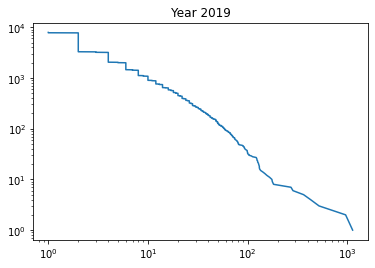

In [43]:
df_2019 = wordfrequency_df[wordfrequency_df['year'] == 2019].sort_values(by = 'Frequency', ascending = False)
df_2019['rank'] = range(1,len(df_2019)+1)
plt.loglog(df_2019['Frequency'], df_2019['rank'])
plt.title('Year 2019')

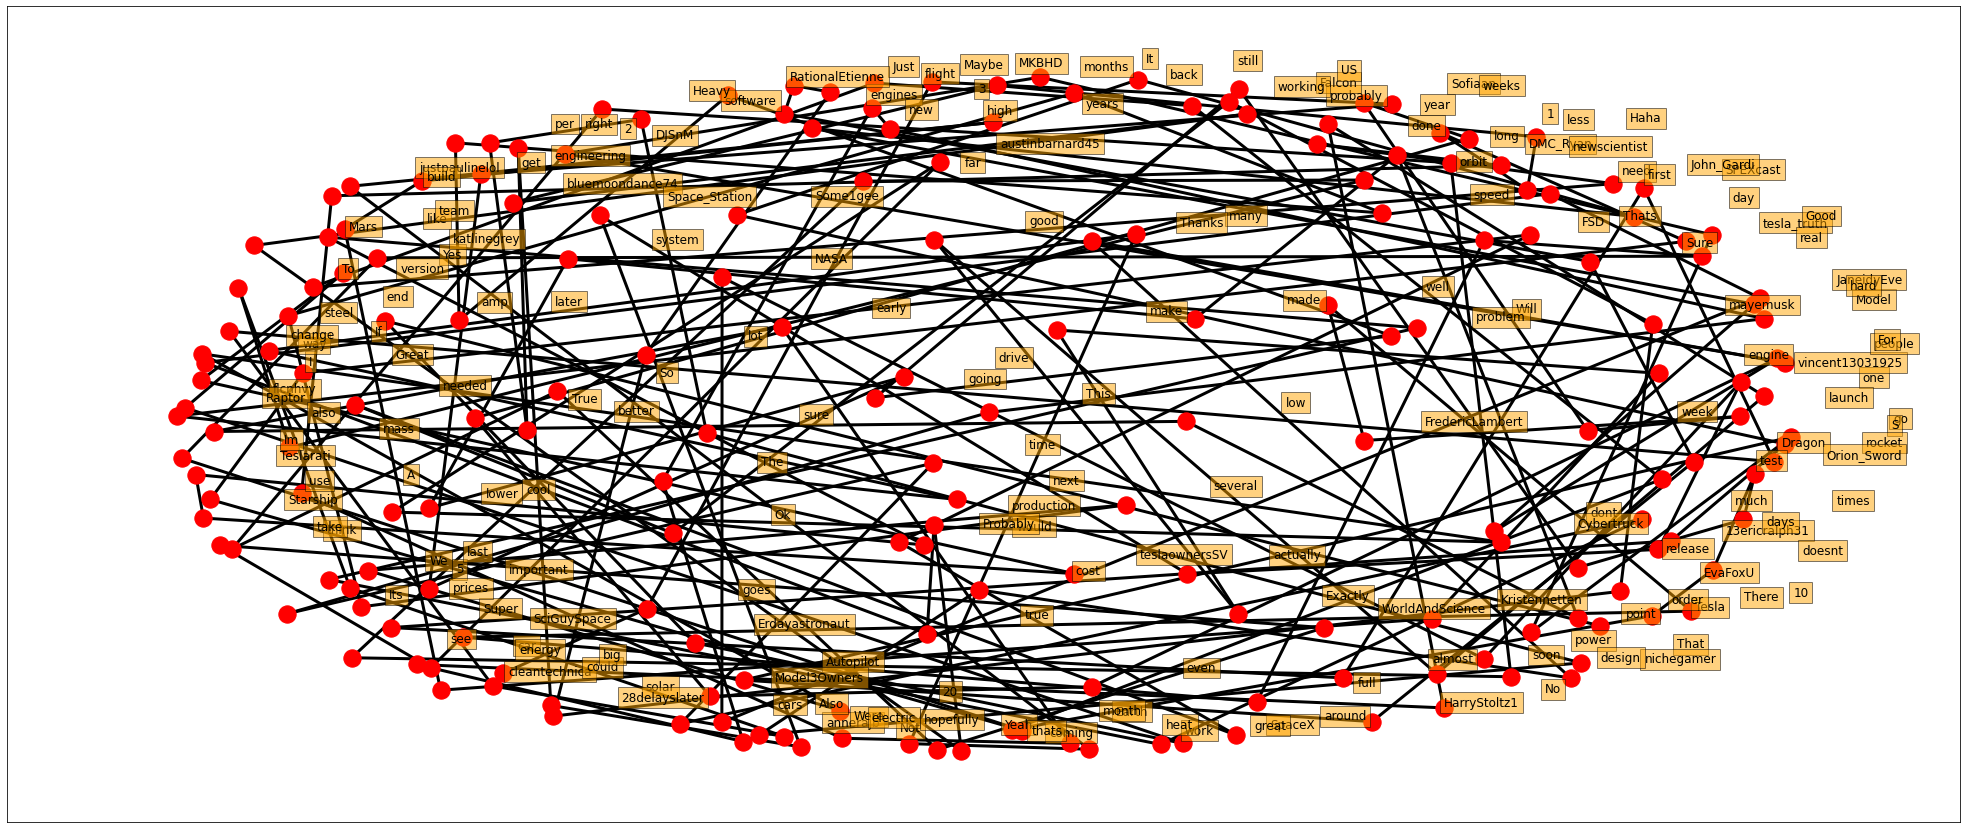

In [50]:
#create bigrams for year 2019

df_freq_2019=df_2019.iloc[:,0:2]
freq_list_2019=df_freq_2019["word"].tolist()

from nltk.util import bigrams
#x=list(bigrams(freq_list))
bigrams =list(nltk.bigrams(freq_list_2019))

bigra_dist =nltk.FreqDist(bigrams)
df_bigrams=pd.DataFrame(bigra_dist.most_common(200),columns=['Bigrams','Frequency'])


# Creating  dictionary of bigrams
dic = df_bigrams.set_index('Bigrams').T.to_dict('records')

# Create network plot 
N = nx.Graph()

# Create connections between nodes
for a, b in dic[0].items():
    N.add_edge(a[0], a[1], weight=(b * 10))

fig, ax = plt.subplots(figsize=(35, 15))

pos = nx.spring_layout(N, k=2)

# Plot networks
nx.draw_networkx(N, pos,
                 font_size=16,
                 width=3,
                 edge_color='black',
                 node_color='red',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='orange', alpha=0.5),
            horizontalalignment='center', fontsize=12)
    
plt.show()

Text(0.5, 1.0, 'Year 2020')

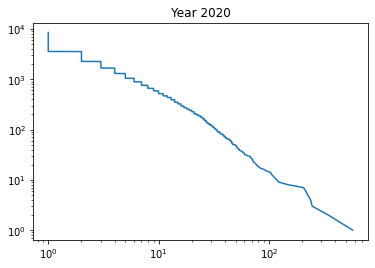

In [51]:
df_2020 = wordfrequency_df[wordfrequency_df['year'] == 2020].sort_values(by = 'Frequency', ascending = False)
df_2020['rank'] = range(1,len(df_2020)+1)
plt.loglog(df_2020['Frequency'], df_2020['rank'])
plt.title('Year 2020')

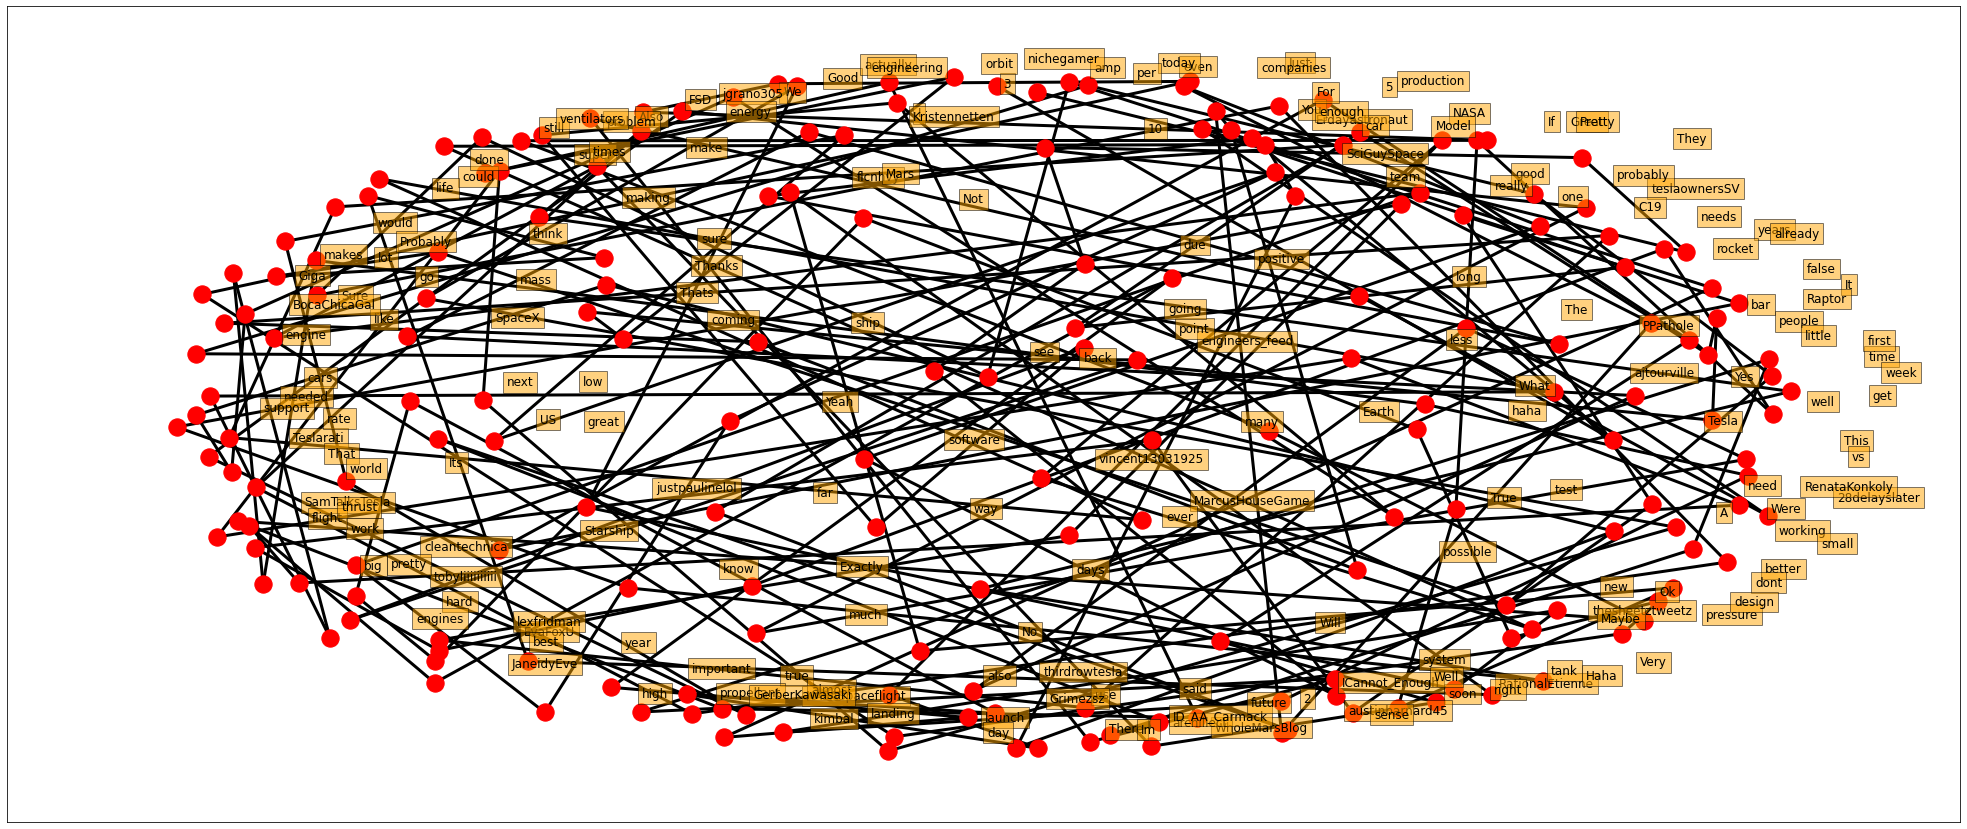

In [53]:
#create bigrams for year 2020

df_freq_2020=df_2020.iloc[:,0:2]
freq_list_2020=df_freq_2020["word"].tolist()

from nltk.util import bigrams
#x=list(bigrams(freq_list))
bigrams =list(nltk.bigrams(freq_list_2020))

bigra_dist =nltk.FreqDist(bigrams)
df_bigrams=pd.DataFrame(bigra_dist.most_common(200),columns=['Bigrams','Frequency'])


# Creating  dictionary of bigrams
dic = df_bigrams.set_index('Bigrams').T.to_dict('records')

# Create network plot 
N = nx.Graph()

# Create connections between nodes
for a, b in dic[0].items():
    N.add_edge(a[0], a[1], weight=(b * 10))

fig, ax = plt.subplots(figsize=(35, 15))

pos = nx.spring_layout(N, k=2)

# Plot networks
nx.draw_networkx(N, pos,
                 font_size=16,
                 width=3,
                 edge_color='black',
                 node_color='red',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='orange', alpha=0.5),
            horizontalalignment='center', fontsize=12)
    
plt.show()

Text(0.5, 1.0, 'Year 2021')

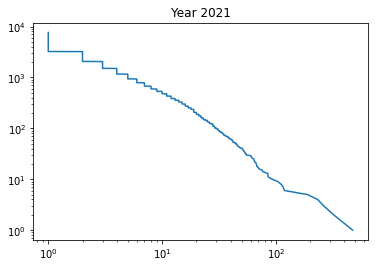

In [54]:
df_2021 = wordfrequency_df[wordfrequency_df['year'] == 2021].sort_values(by = 'Frequency', ascending = False)
df_2021['rank'] = range(1,len(df_2021)+1)
plt.loglog(df_2021['Frequency'], df_2021['rank'])
plt.title('Year 2021')

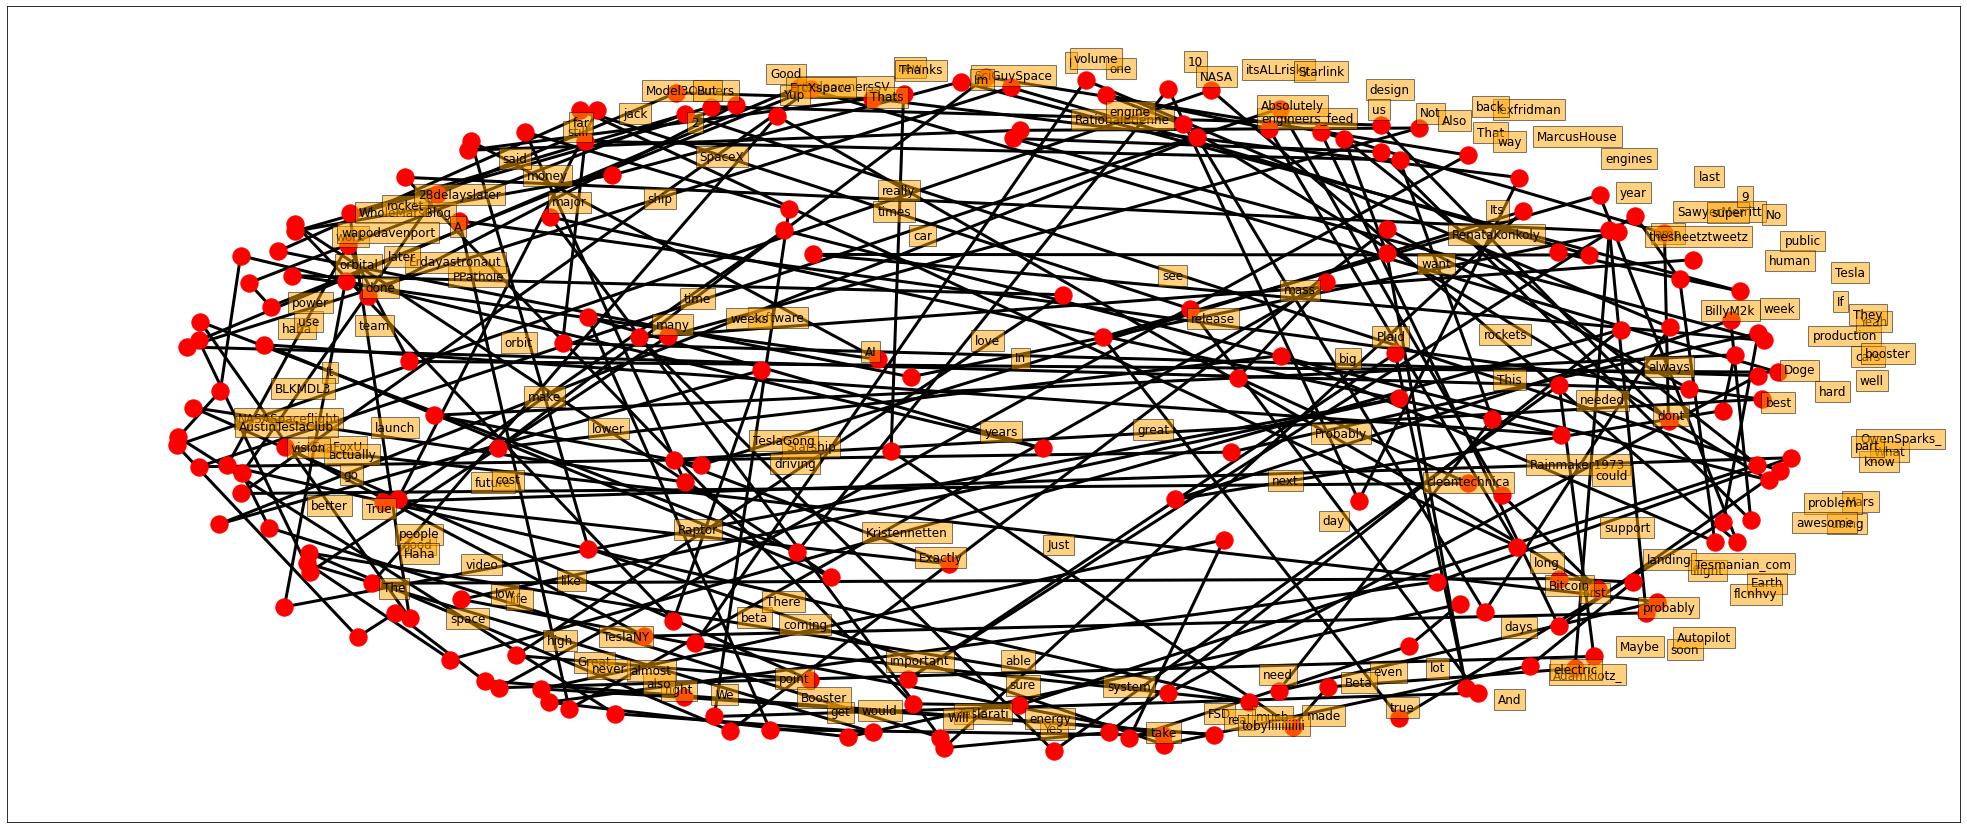

In [55]:
#create bigrams for year 2021

df_freq_2021=df_2021.iloc[:,0:2]
freq_list_2021=df_freq_2021["word"].tolist()

from nltk.util import bigrams
#x=list(bigrams(freq_list))
bigrams =list(nltk.bigrams(freq_list_2021))

bigra_dist =nltk.FreqDist(bigrams)
df_bigrams=pd.DataFrame(bigra_dist.most_common(200),columns=['Bigrams','Frequency'])


# Creating  dictionary of bigrams
dic = df_bigrams.set_index('Bigrams').T.to_dict('records')

# Create network plot 
N = nx.Graph()

# Create connections between nodes
for a, b in dic[0].items():
    N.add_edge(a[0], a[1], weight=(b * 10))

fig, ax = plt.subplots(figsize=(35, 15))

pos = nx.spring_layout(N, k=2)

# Plot networks
nx.draw_networkx(N, pos,
                 font_size=16,
                 width=3,
                 edge_color='black',
                 node_color='red',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='orange', alpha=0.5),
            horizontalalignment='center', fontsize=12)
    
plt.show()

Text(0.5, 1.0, 'Year 2022')

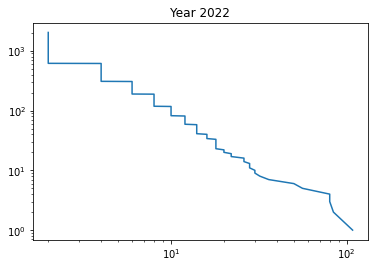

In [56]:
df_2022 = wordfrequency_df[wordfrequency_df['year'] == 2022].sort_values(by = 'Frequency', ascending = False)
df_2022['rank'] = range(1,len(df_2022)+1)
plt.loglog(df_2022['Frequency'], df_2022['rank'])
plt.title('Year 2022')

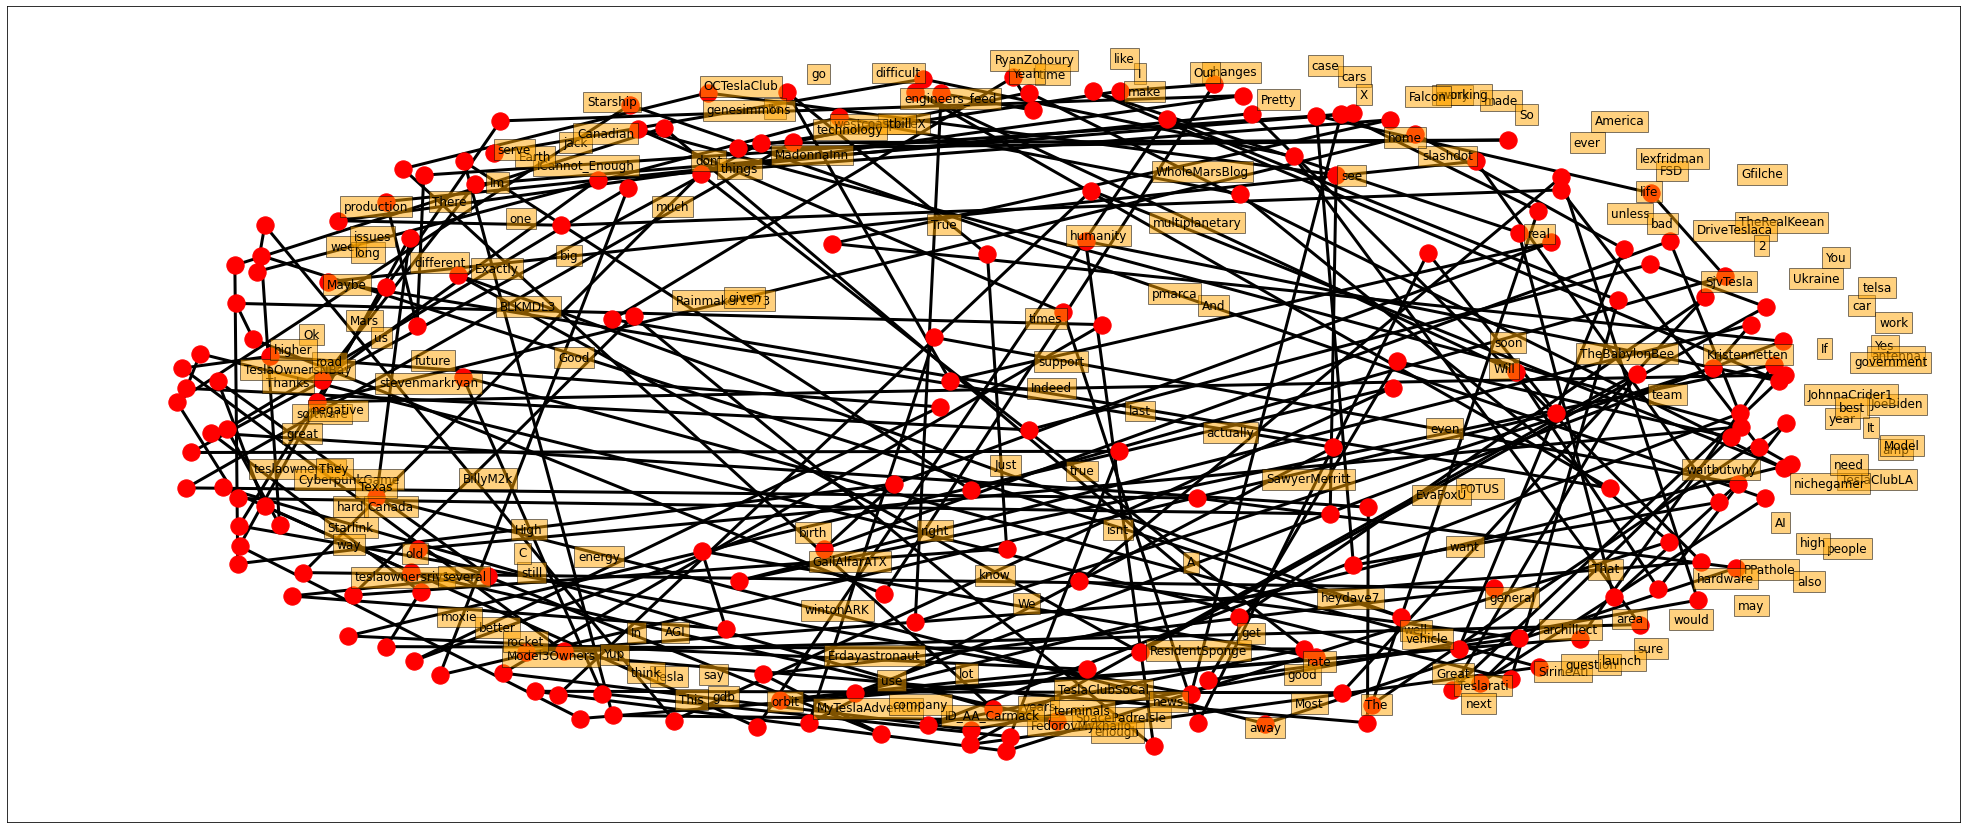

In [59]:
#create bigrams for year 2022

df_freq_2022=df_2022.iloc[:,0:2]
freq_list_2022=df_freq_2022["word"].tolist()

from nltk.util import bigrams
#x=list(bigrams(freq_list))
bigrams =list(nltk.bigrams(freq_list_2022))

bigra_dist =nltk.FreqDist(bigrams)
df_bigrams=pd.DataFrame(bigra_dist.most_common(200),columns=['Bigrams','Frequency'])


# Creating  dictionary of bigrams
dic = df_bigrams.set_index('Bigrams').T.to_dict('records')

# Create network plot 
N = nx.Graph()

# Create connections between nodes
for a, b in dic[0].items():
    N.add_edge(a[0], a[1], weight=(b * 10))

fig, ax = plt.subplots(figsize=(35, 15))

pos = nx.spring_layout(N, k=2)

# Plot networks
nx.draw_networkx(N, pos,
                 font_size=16,
                 width=3,
                 edge_color='black',
                 node_color='red',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='orange', alpha=0.5),
            horizontalalignment='center', fontsize=12)
    
plt.show()